# Rex-Omni Keypointing Tutorial

This notebook demostrates how to use Rex-Omni for Keypoint Detection tasks.

## Step 1: Initialize Rex Omni Model

In [1]:
# Import required libraries
import torch
from PIL import Image
from rex_omni import RexOmniWrapper, RexOmniVisualize
import matplotlib.pyplot as plt
import numpy as np

# Rex-Omni supports both Transformers and VLLM backends by switching the backend parameter.
model_path = "IDEA-Research/Rex-Omni"  # Replace with your model path

print("🚀 Initializing Rex Omni model...")

rex_model = RexOmniWrapper(
    model_path=model_path,
    backend="transformers",  # Choose "transformers" or "vllm"
    max_tokens=2048,
    temperature=0.0,
    top_p=0.05,
    top_k=1,
    repetition_penalty=1.05,
)

🚀 Initializing Rex Omni model...
Initializing transformers backend...


/home/jiangqing/miniconda3/envs/r1/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2025-09-30 14:45:30,669] [INFO] [real_accelerator.py:239:get_accelerator] Setting ds_accelerator to cuda (auto detect)


/usr/bin/ld: cannot find -laio
collect2: error: ld returned 1 exit status
/usr/bin/ld: /home/jiangqing/usr/local/cuda-12.1/lib64/libcufile.so: undefined reference to `dlopen'
/usr/bin/ld: /home/jiangqing/usr/local/cuda-12.1/lib64/libcufile.so: undefined reference to `dlclose'
/usr/bin/ld: /home/jiangqing/usr/local/cuda-12.1/lib64/libcufile.so: undefined reference to `dlerror'
/usr/bin/ld: /home/jiangqing/usr/local/cuda-12.1/lib64/libcufile.so: undefined reference to `dlsym'
collect2: error: ld returned 1 exit status
Loading checkpoint shards: 100%|██████████| 2/2 [00:15<00:00,  7.91s/it]


## Example 1: Keypointing for Person

✅ Image loaded successfully!
📏 Image size: (740, 494)


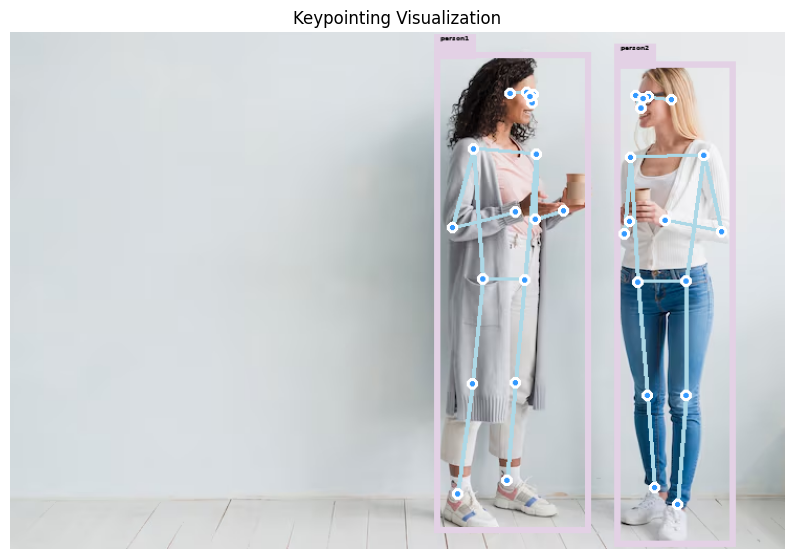

In [4]:
image_path = "test_images/person.png"  # Replace with your image path
image = Image.open(image_path).convert("RGB")
print(f"✅ Image loaded successfully!")
print(f"📏 Image size: {image.size}")

# inference
results = rex_model.inference(images=image, task="keypoint", keypoint_type='person', categories=['person'])

result = results[0]
if result["success"]:
    predictions = result["extracted_predictions"]
    vis_image = RexOmniVisualize(
        image=image,
        predictions=predictions,
        font_size=6,
        draw_width=6,
        show_labels=True,
    )
    # display the visualization
    plt.figure(figsize=(10, 8))
    plt.imshow(vis_image)
    plt.axis("off")
    plt.title("Keypointing Visualization")
    plt.show()

else:
    print(f"Inference failed: {result['error']}")

## Example 1: Keypointing for Animals

✅ Image loaded successfully!
📏 Image size: (724, 345)


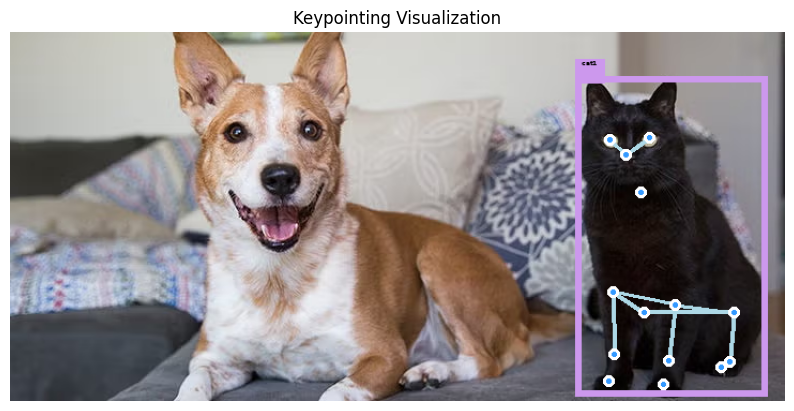

: 

In [ ]:
image_path = "test_images/animal.png"  # Replace with your image path
image = Image.open(image_path).convert("RGB")
print(f"✅ Image loaded successfully!")
print(f"📏 Image size: {image.size}")

# inference
results = rex_model.inference(
    images=image, task="keypoint", keypoint_type="animal", categories=["cat"]
)

result = results[0]
if result["success"]:
    predictions = result["extracted_predictions"]
    vis_image = RexOmniVisualize(
        image=image,
        predictions=predictions,
        font_size=6,
        draw_width=6,
        show_labels=True,
    )
    # display the visualization
    plt.figure(figsize=(10, 8))
    plt.imshow(vis_image)
    plt.axis("off")
    plt.title("Keypointing Visualization")
    plt.show()

else:
    print(f"Inference failed: {result['error']}")